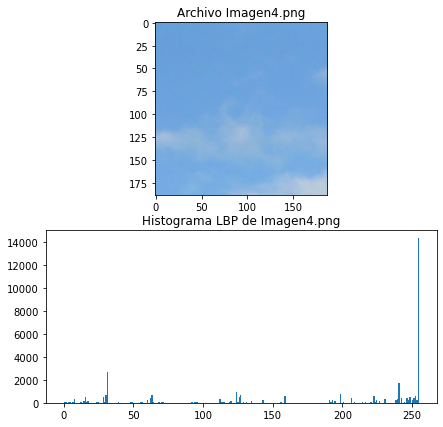

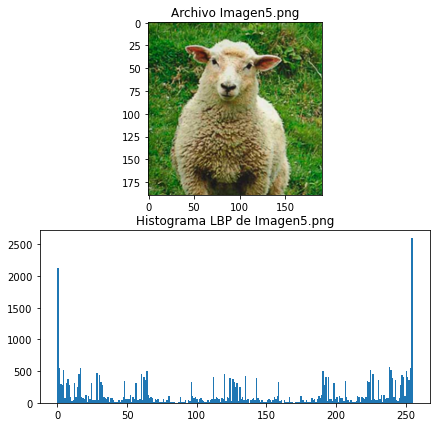

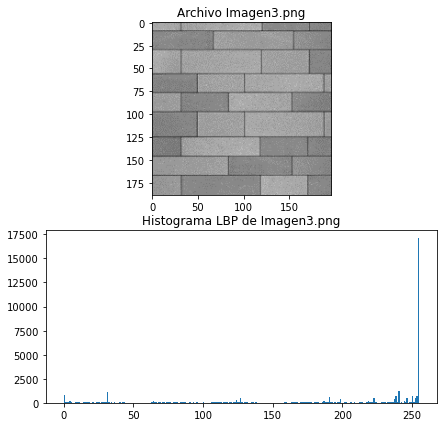

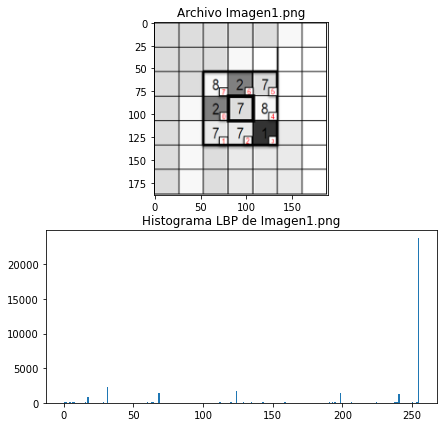

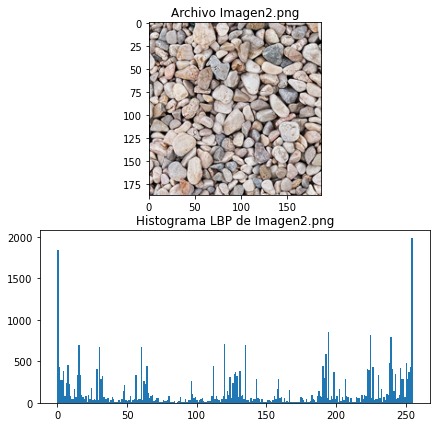

In [124]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

power_2 = np.array([128, 64, 32, 16, 8, 4, 2, 1])
w_hist = {}

for image in glob.glob('*.png'):
    img = cv.imread(image)
    img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_pad = np.pad(gray, pad_width = 1, mode = 'edge')
    #print ("La dimension de la imagen es", gray.shape,"y la dimensiÃ³n con pading es",gray_pad.shape)
    gray_LRB = np.zeros_like(gray)
    for i in range(1, gray_pad.shape[0]-1):
        for j in range(1, gray_pad.shape[1]-1):
            ventana = (np.append(np.append(np.append(gray_pad[i-1,j-1:j+2],gray_pad[i,j+1]),np.flip(gray_pad[i+1,j-1:j+2])),gray_pad[i,j-1]))
            gray_LRB[i-1,j-1] = np.sum((ventana >= gray_pad[i,j])*power_2)
    
    #comp.append(np.ravel(gray_LRB))
    w_hist[image[0:7]]=np.ravel(gray_LRB)
    fig = plt.figure(figsize = (7,7))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.imshow(img_RGB)
    ax1.set_title('Archivo {}'.format(image))
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.hist(np.ravel(gray_LRB), bins = 256)
    ax2.set_title('Histograma LBP de {}'.format(image))
    plt.show()

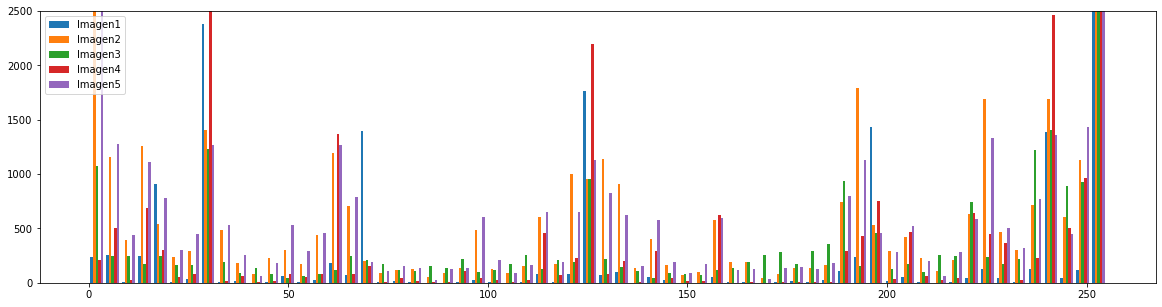

In [127]:
fig = plt.figure(figsize = (20,5))
plt.hist([w_hist['Imagen1'],w_hist['Imagen2'],w_hist['Imagen3'],w_hist['Imagen4'],w_hist['Imagen5']],
          bins = 64, label = ('Imagen1','Imagen2','Imagen3','Imagen4','Imagen5'))
plt.ylim(0,2500)
plt.legend()
plt.show()